In [2]:
#primeiramente importamos todas as libs que serão usadas em todo o projeto e o calculo de rotação
#a pasta padrao do jupyter foi modificada para funcionar na pasta do coppelia: "jupyter notebook --notebook-dir 'C:\Progra~1\CoppeliaRobotics\CoppeliaSimEdu\programming\remoteApiBindings\python\python'"

try:
    import sim
    import time
    import numpy as np
    import matplotlib.pyplot as plt
    import math
    import skgeom as sg
    import skgeom.draw as sgdraw
    from shapely.geometry import Polygon
    from shapely.geometry import Point
    from descartes.patch import PolygonPatch
    from skgeom import minkowski
except:
    print ('--------------------------------------------------------------')
    print ('"sim.py" could not be imported. This means very probably that')
    print ('either "sim.py" or the remoteApi library could not be found.')
    print ('Make sure both are in the same folder as this file,')
    print ('or appropriately adjust the file "sim.py"')
    print ('--------------------------------------------------------------')
    print ('')


    
    #Rotação:
    
def Rx(theta):
 
    return np.array([[  1, 0            , 0           ],
                      [ 0, np.cos(theta),-np.sin(theta)],
                      [ 0, np.sin(theta), np.cos(theta)]])
  
def Ry(theta):
 
    return np.array([[  np.cos(theta), 0, np.sin(theta)],
                      [ 0            , 1, 0           ],
                      [-np.sin(theta), 0, np.cos(theta)]])
def Rz(theta):
  
    return np.array([[ np.cos(theta), -np.sin(theta), 0 ],
                      [ np.sin(theta), np.cos(theta) , 0 ],
                      [ 0            , 0             , 1 ]])

print ('tudo certo')

tudo certo


In [56]:
#1) Crie uma nova cena, adicione um robô móvel (e.g., Pioneer 3DX) e outros quatro elementos
#quaisquer diferentes (e.g., móveis, pessoas, outros robôs, etc) espalhados pelo ambiente.

In [ ]:
[0,5 pts] Em seguida, você deverá modelar e representar todos os sistemas de coordenadas da
cena. Isso deverá ser detalhadamente descrito e ilustrado na documentação por um diagrama.

Program started
Connected to remote API server
posicao obj1, -obj1pos- [1.7120715379714966, 0.9010560512542725, 1.051673173904419]
matriz sem z - ,-matrizobj- 
 [[ 1.71207154  0.90105605]
 [ 1.71192527 -1.7161603 ]
 [-0.61122906  0.53247416]
 [ 0.0621838  -2.0322628 ]]
obj1or [7.968654244905338e-05, 0.0054501937702298164, -1.4559314250946045]
obj2or [9.003712330013514e-05, 0.0057971905916929245, -1.4559156894683838]
obj3or [8.072760829236358e-05, 0.005593661218881607, -1.4558953046798706]
obj4or [8.216559945140034e-05, 0.005605739541351795, -1.4558905363082886]
matriz das rotacoes em alfa beta e gama - matrizor- 
 [[ 7.96865424e-05  5.45019377e-03 -1.45593143e+00]
 [ 9.00371233e-05  5.79719059e-03 -1.45591569e+00]
 [ 8.07276083e-05  5.59366122e-03 -1.45589530e+00]
 [ 8.21655995e-05  5.60573954e-03 -1.45589054e+00]]
matriz apenas com o z [-1.45593143 -1.45591569 -1.4558953  -1.45589054]
matrizrot [[ 7.96865424e-05  5.45019377e-03 -1.45593143e+00]
 [ 9.00371233e-05  5.79719059e-03 -1.455

<ipython-input-32-8c1a4f89da1d>:94: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  R = Rz(np.asscalar(matrizobj[0, 2:]))
<ipython-input-32-8c1a4f89da1d>:101: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  R = Rz(np.asscalar(matrizobj[1, 2:]))
<ipython-input-32-8c1a4f89da1d>:108: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  R = Rz(np.asscalar(matrizobj[2, 2:]))
<ipython-input-32-8c1a4f89da1d>:115: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  R = Rz(np.asscalar(matrizobj[3, 2:]))


(-5.0, 5.0, -5.0, 5.0)

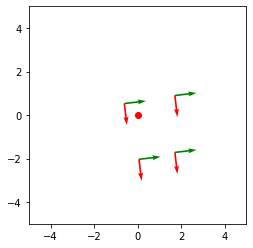

In [32]:
#primeiro conectamos ao coppelia e buscamos as informacoes de orientacao dos objetos:
print ('Program started')
sim.simxFinish(-1) # just in case, close all opened connections
clientID=sim.simxStart('127.0.0.1',19999,True,True,5000,5) # Connect to CoppeliaSim

if clientID!=-1:
    print ('Connected to remote API server')
 

   #descobrir o handle dos objetos da cena
res,obj1 = sim.simxGetObjectHandle(clientID,'coluna_1',sim.simx_opmode_blocking)
res,obj2 = sim.simxGetObjectHandle(clientID,'coluna_2',sim.simx_opmode_blocking)
res,obj3 = sim.simxGetObjectHandle(clientID,'coluna_3',sim.simx_opmode_blocking)
res,obj4 = sim.simxGetObjectHandle(clientID,'coluna_4',sim.simx_opmode_blocking)
res,robo = sim.simxGetObjectHandle(clientID,'Pioneer_p3dx',sim.simx_opmode_blocking)

#da posse do handle, extrair a posicao em relacao ao robô
res,obj1pos = sim.simxGetObjectPosition(clientID,obj1,robo,sim.simx_opmode_blocking)
res,obj2pos = sim.simxGetObjectPosition(clientID,obj2,robo,sim.simx_opmode_blocking)
res,obj3pos = sim.simxGetObjectPosition(clientID,obj3,robo,sim.simx_opmode_blocking)
res,obj4pos = sim.simxGetObjectPosition(clientID,obj4,robo,sim.simx_opmode_blocking)

print ('posicao obj1, -obj1pos-', obj1pos)

#matriz com os 4 obj
matrizobj = obj1pos
matrizobj = np.row_stack((matrizobj, obj2pos))
matrizobj = np.row_stack((matrizobj, obj3pos))
matrizobj = np.row_stack((matrizobj, obj4pos))

#apagar eixo z
matrizobj = np.delete(matrizobj, 2, 1)
print ('matriz sem z - ,-matrizobj- \n',matrizobj)


#extrair então o angulo dos objetos em relação ao robô
res,obj1or = sim.simxGetObjectOrientation(clientID,obj1,robo,sim.simx_opmode_blocking)
res,obj2or = sim.simxGetObjectOrientation(clientID,obj2,robo,sim.simx_opmode_blocking)
res,obj3or = sim.simxGetObjectOrientation(clientID,obj3,robo,sim.simx_opmode_blocking)
res,obj4or = sim.simxGetObjectOrientation(clientID,obj4,robo,sim.simx_opmode_blocking)

print ('obj1or', obj1or)
print ('obj2or', obj2or)
print ('obj3or', obj3or)
print ('obj4or', obj4or)

#matriz com os 4 obj
matrizor = obj1or
matrizor = np.row_stack((matrizor, obj2or))
matrizor = np.row_stack((matrizor, obj3or))
matrizor = np.row_stack((matrizor, obj4or))

print ('matriz das rotacoes em alfa beta e gama - matrizor- \n', matrizor)

#remover angulos alfa e beta######################################################################

matrizorz = matrizor[:, 2]

print ('matriz apenas com o z', matrizorz)

#adicionar o angulo depois da posicao, ficando (x,y,theta)

matrizobj = np.column_stack((matrizobj, matrizorz))

print ('matrizrot', matrizor)

print  ('matrizfinal (x,y,gamma', matrizobj)

print ('teste do xy', matrizobj[0, 2:])

# Plota um referencial no plano
def plot_frame(Porg, R, c=None):
    
    axis_size = 1.0    
    axes = axis_size*R
    
    x_axis = np.array(axes[0:2,0])
    y_axis = np.array(axes[0:2,1])
    
    if c == None:
        c = ['r', 'g']
    
    # X
    plt.quiver(*Porg[0:2], *x_axis, color=c[0], angles='xy', scale_units='xy', scale=1)
    
    # Y
    plt.quiver(*Porg[0:2], *y_axis, color=c[1], angles='xy', scale_units='xy', scale=1)


plt.figure()

# Obj1
Porg = matrizobj[0, :2]
R = Rz(np.asscalar(matrizobj[0, 2:]))
plot_frame(Porg, R)

print (Porg, R)

# Obj2
Porg = matrizobj[1, :2]
R = Rz(np.asscalar(matrizobj[1, 2:]))
plot_frame(Porg, R)

print (Porg, R)

# Obj3
Porg = matrizobj[2, :2]
R = Rz(np.asscalar(matrizobj[2, 2:]))
plot_frame(Porg, R)

print (Porg, R)

# Obj4
Porg = matrizobj[3, :2]
R = Rz(np.asscalar(matrizobj[3, 2:]))
plot_frame(Porg, R)

print (Porg, R)

#Robo
plt.plot(0, 0, 'ro')

plt.axis('scaled')
plt.axis((-5, 5, -5, 5))


In [ ]:
#3) [1,0 pts] Considerando que a configuração do robô no referencial global é dada por q = [𝑥, 𝑦, 𝜃],
#defina as matrizes de transformação homogêneas que representam as posições de todos os outros
#elementos da cena no referencial local do robô. Escreva um script que plota esses referenciais e
#os relacionamentos entre eles (dica: você pode usar os códigos vistos em aula como base). Para
#os cálculos, as posições dos elementos devem ser recuperadas utilizando-se a RemoteAP

Program started
Connected to remote API server
[0.5006407499313354, -1.8579158782958984, 0.13819530606269836] [-0.012942151166498661, -0.008891472592949867, -0.9647104740142822]
(-0.19605103135108948, 0.06928559392690659, 0)
matriz de transformação local robo p global 
 [[0.9992856466526568 0.03779148573397827 0 -0.19605103135108948]
 [-0.03779148573397827 0.9992856466526568 0 0.06928559392690659]
 [0 0 1 0.0]
 [0 0 0 1]]
[1.7158534376082761 -0.8938332838297582 0.0 1.398324606032197]
[1.7158534376082761 -0.8938332838297582] [[0.11461248140062004 0.9934102773311703 0]
 [-0.9934102773311703 0.11461248140062004 0]
 [0 0 1]]
[-0.43527818208224933 -2.384623071758698] [[0.1146281133192377 0.9934084737090136 0]
 [-0.9934084737090136 0.1146281133192377 0]
 [0 0 1]]
[0.08944239991305891 0.805685890843439] [[0.1146483637170638 0.9934061368327658 0]
 [-0.9934061368327658 0.1146483637170638 0]
 [0 0 1]]
[-1.6348610212980597 -1.208796245275148] [[0.11465310064535267 0.9934055901354726 0]
 [-0.99340

<ipython-input-78-b3a3a7b8d890>:78: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  R = Rz(np.asscalar(matrizobj[0, 2:]))
<ipython-input-78-b3a3a7b8d890>:85: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  R = Rz(np.asscalar(matrizobj[1, 2:]))
<ipython-input-78-b3a3a7b8d890>:92: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  R = Rz(np.asscalar(matrizobj[2, 2:]))
<ipython-input-78-b3a3a7b8d890>:99: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  R = Rz(np.asscalar(matrizobj[3, 2:]))


(-5.0, 5.0, -5.0, 5.0)

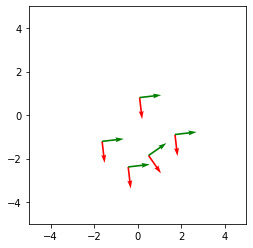

In [78]:
#como inicialmente importamos os dados com o referencial do robô, se q não é zero, devemos fazer a rotação e a translação
#de todos os elementos da cena para que passem para o ponto referencial global, com uma matriz de transformação
#primeiramente devemos recuperar a posição global do robo e sua orientação
#conexão
print ('Program started')
sim.simxFinish(-1) # just in case, close all opened connections
clientID=sim.simxStart('127.0.0.1',19999,True,True,5000,5) # Connect to CoppeliaSim

if clientID!=-1:
    print ('Connected to remote API server')
    
#dados robo em strings xyz e alfa beta gama    
res,pw_robo = sim.simxGetObjectPosition(clientID,robo,-1,sim.simx_opmode_blocking)
res,ow_robo = sim.simxGetObjectOrientation(clientID,robo,-1,sim.simx_opmode_blocking)
print (pw_robo, ow_robo)

#na notacao da aula, a posicao do robo em x e y será pg_lorg(a diferenca entre a posicao global e a do robo)
#sendo que o eixo z foi desconsiderado. Portanto, montamos pa_borg

pg_lorg = (p_robo[0], p_robo[1],0)
print (pg_lorg)
#criamos a array auxiliar:
aux = np.array([0, 0, 0, 1])
#rotacao de global para local do eixo z
Rgl = Rz(ow_robo[2])
#rotacao de local para global
Rlg = Rgl.T
pl_gorg = -Rlg @ pg_lorg

Tlg = np.column_stack((Rlg,pl_gorg.T))
Tlg = np.row_stack((Tlg, aux))


print ('matriz de transformação local robo p global \n',Tgl)

#de posse dessa matriz, basta multiplica-la com a posição local dos objetos para obter a posição global dos mesmos.
#buscamos primeiro a leitura do objeto na cena pelo robo e colocamos no formato x,y,0,1

Pl_obj1 = np.array([obj1pos[0],obj1pos[1],0,1]) #posicao local (x,y,z(0), 1)
Pl_obj2 = np.array([obj2pos[0],obj2pos[1],0,1]) #posicao local (x,y,z(0), 1)
Pl_obj3 = np.array([obj3pos[0],obj3pos[1],0,1]) #posicao local (x,y,z(0), 1)
Pl_obj4 = np.array([obj4pos[0],obj4pos[1],0,1]) #posicao local (x,y,z(0), 1)
                   
#fazemos então a multiplicacao pela matriz transformacao inversa local global e temos as novas coordenadas globais
                   
Pg_obj1 = Pl_obj1 @ Tlg
Pg_obj2 = Pl_obj2 @ Tlg
Pg_obj3 = Pl_obj3 @ Tlg
Pg_obj4 = Pl_obj4 @ Tlg

# de posse das novas posiçoes, basta plotar com 3 posicoes diferentes para certificar que funciona o script:

# Plota um referencial no plano
def plot_frame(Porg, R, c=None):
    
    axis_size = 1.0    
    axes = axis_size*R
    
    x_axis = np.array(axes[0:2,0])
    y_axis = np.array(axes[0:2,1])
    
    if c == None:
        c = ['r', 'g']
    
    # X
    plt.quiver(*Porg[0:2], *x_axis, color=c[0], angles='xy', scale_units='xy', scale=1)
    
    # Y
    plt.quiver(*Porg[0:2], *y_axis, color=c[1], angles='xy', scale_units='xy', scale=1)


plt.figure()

print (Pg_obj1)

# Obj1
Porg = Pg_obj1[:2]
R = Rz(np.asscalar(matrizobj[0, 2:]))
plot_frame(Porg, R)

print (Porg, R)

# Obj2
Porg = Pg_obj2[:2]
R = Rz(np.asscalar(matrizobj[1, 2:]))
plot_frame(Porg, R)

print (Porg, R)

# Obj3
Porg = Pg_obj3[:2]
R = Rz(np.asscalar(matrizobj[2, 2:]))
plot_frame(Porg, R)

print (Porg, R)

# Obj4
Porg = Pg_obj4[:2]
R = Rz(np.asscalar(matrizobj[3, 2:]))
plot_frame(Porg, R)

print (Porg, R)

#Robo
Porg = pw_robo[:2]
R = Rz(ow_robo[2])
plot_frame(Porg, R)

plt.axis('scaled')
plt.axis((-5, 5, -5, 5))